In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (12,6)

## timing data

In [3]:
dt = pd.read_csv("ttvs_h16+.tsv", delimiter='|', comment='#')
dt['tn'] = dt['tn'] + 67 # BJD-2454833
dt['pidx'] = 1
dt['pidx'][dt.KOI==620.02] = 3
dt['pidx'][dt.KOI==620.03] = 2
dt['tc'] = dt.tn + dt['O-C'] / 1440.
dt['tcerr'] = dt["e_O-C"] / 1440.
dt = dt.sort_values(["pidx", "N"]).reset_index(drop=True)

/var/folders/68/h6r0kcq50914zzw8n_70l69c0000gn/T/ipykernel_72188/2364188373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['pidx'][dt.KOI==620.02] = 3
/var/folders/68/h6r0kcq50914zzw8n_70l69c0000gn/T/ipykernel_72188/2364188373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['pidx'][dt.KOI==620.03] = 2


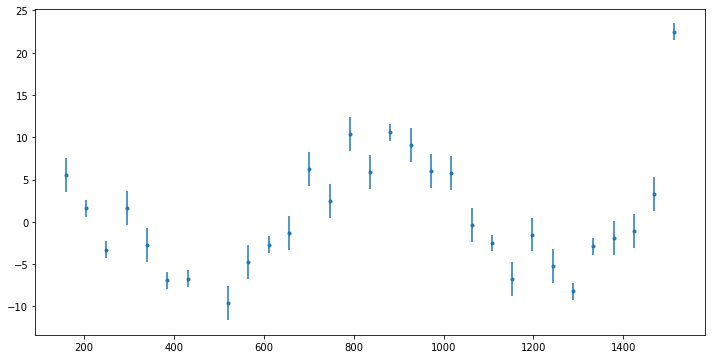

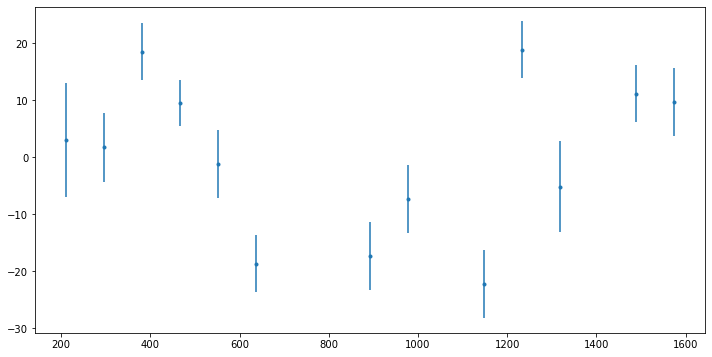

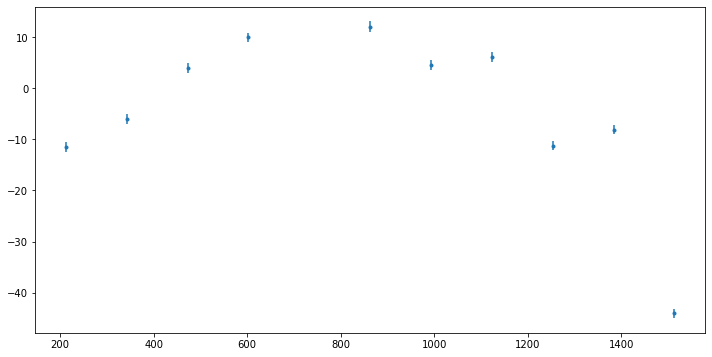

In [4]:
for pidx in [1,2,3]:
    plt.figure()
    plt.errorbar(dt[dt.pidx==pidx].tc, dt[dt.pidx==pidx]['O-C'], fmt='.', yerr=dt[dt.pidx==pidx].tcerr*1440.)

In [5]:
dt[['N', 'tc', 'tcerr', 'pidx', 'Over']].to_csv("ttvs.txt", index=False)

## lightcurve data

In [6]:
kic = 11773022

In [7]:
result_all = lk.search_lightcurve('KIC %d'%kic, author='Kepler')

In [8]:
result_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011773022,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr011773022,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr011773022,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr011773022,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr011773022,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr011773022,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr011773022,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr011773022,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr011773022,0.0


In [9]:
result_long = result_all[np.array(result_all.exptime) == 1800]

In [10]:
result_long

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011773022,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr011773022,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr011773022,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr011773022,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr011773022,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr011773022,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr011773022,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr011773022,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr011773022,0.0


In [11]:
lc_data = result_long.download_all()

## detrending

In [12]:
def lc_quarter(lc_data, idx):
    lc = lc_data[idx]
    t, f, e = lc.time.value, np.array(lc.pdcsap_flux).astype(np.float64), np.array(lc.pdcsap_flux_err).astype(np.float64)
    qual = np.array(lc.quality)
    idx = (t==t) * (f==f) * (e==e)
    t, f, e, qual = t[idx], f[idx], e[idx], qual[idx]
    fmed = np.median(f)
    f /= fmed
    e /= fmed
    return t, f, e, qual

from sklearn import linear_model
def design_matrix_fourier(x, df=None, fmax=None):
    if df is None:
        df = 1./(x[-1]-x[0])
    if fmax is None:
        fmax = 0.5/(np.min(np.diff(x)))
    nfou = int(np.round(fmax/df))
    ndata = len(x)
    X = np.zeros((ndata, 2*nfou+1))
    X[:,0] = np.ones(ndata)
    xmed = np.median(x)
    for i in range(nfou):
        _f = df * (i+1)
        X[:,1+2*i] = np.cos(2*np.pi*_f*(x-xmed))
        X[:,2+2*i] = np.sin(2*np.pi*_f*(x-xmed))
    return X

def irls_fit(x, y, X, n_itr=10):
    clf = linear_model.LinearRegression(fit_intercept=False)
    #clf = linear_model.Lasso(fit_intercept=False)
    sigma = np.std(y)
    delta = np.zeros_like(y)
    for i in range(n_itr):
        w = 1./np.sqrt(sigma**2+delta**2)
        w[np.abs(delta) > sigma] = 0.
        reg = clf.fit(X, y, sample_weight=w)
        ypred = reg.predict(X)
        delta = y - ypred
        sigma = np.std(delta)
    return ypred

def fourier_baseline(t, f, filter_period):
    df = min(0.3/filter_period, 1./(t[-1]-t[0])*0.5)
    X = design_matrix_fourier(t, fmax=1./filter_period, df=df)
    fbase = irls_fit(t, f, X)
    return fbase

In [13]:
tlist, flist, elist, qlist = [], [], [], []
for q in range(len(lc_data)):
    t, f, e, qual = lc_quarter(lc_data, q)
    tlist.append(t)
    flist.append(f)
    elist.append(e)
    qlist.append(qual)

In [14]:
filter_period = 1.5

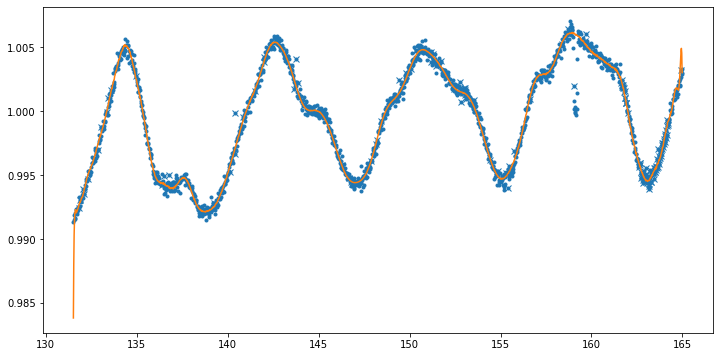

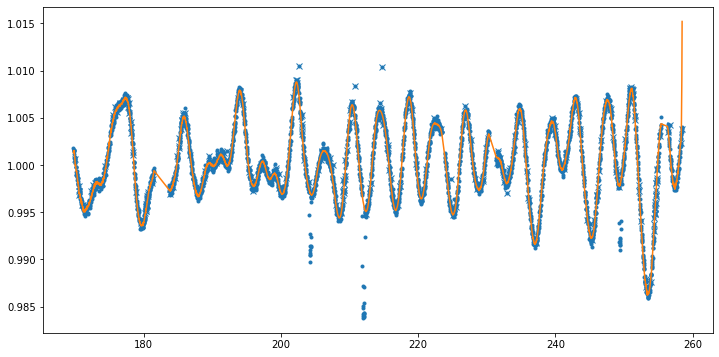

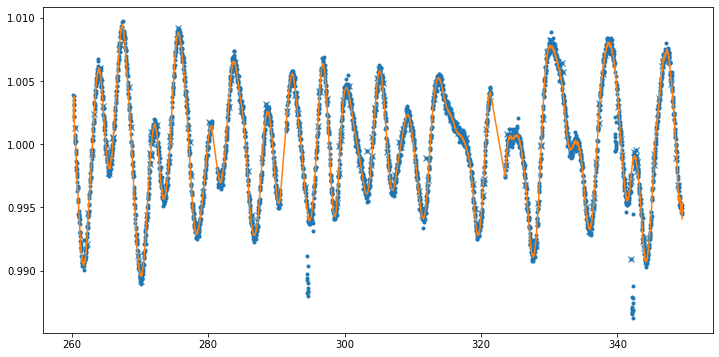

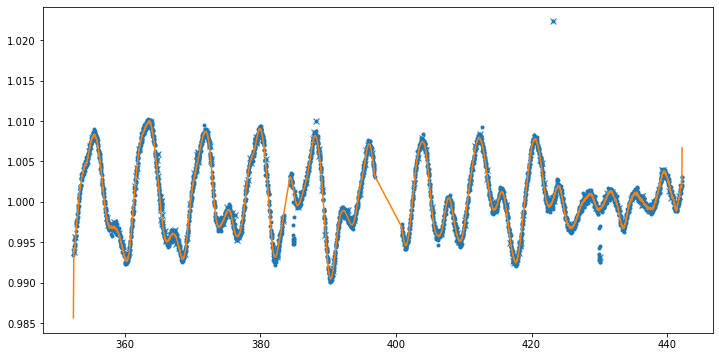

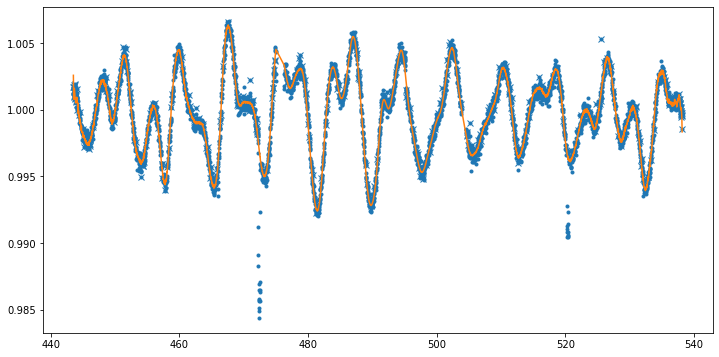

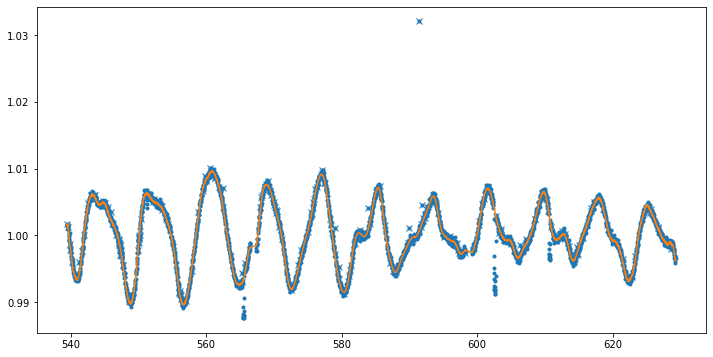

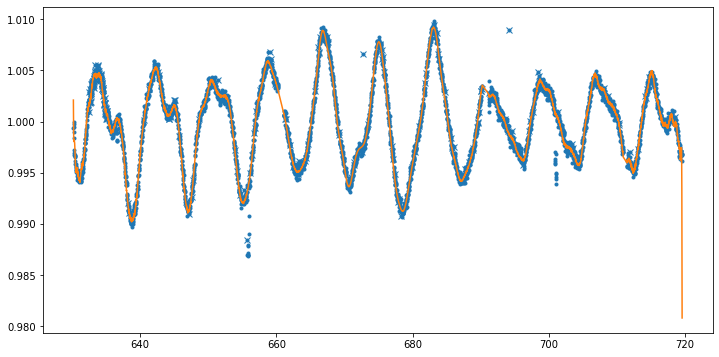

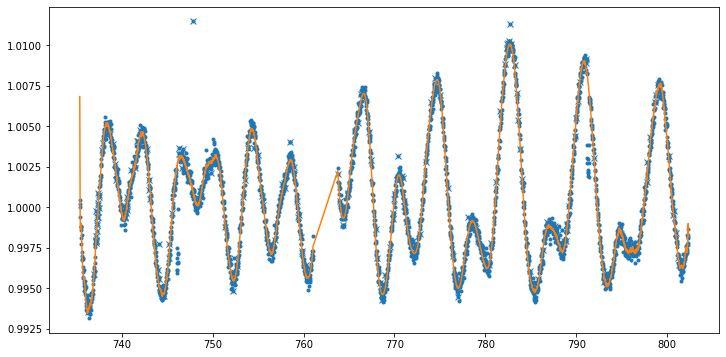

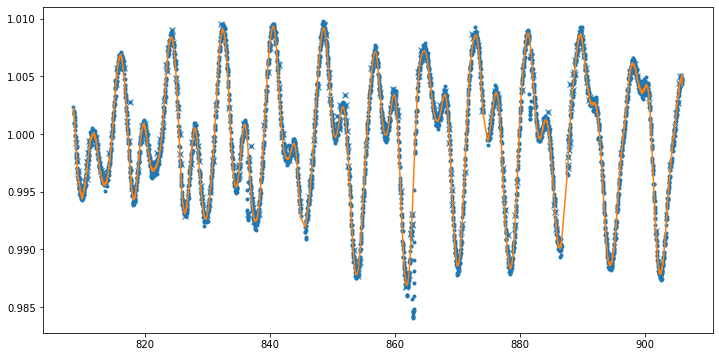

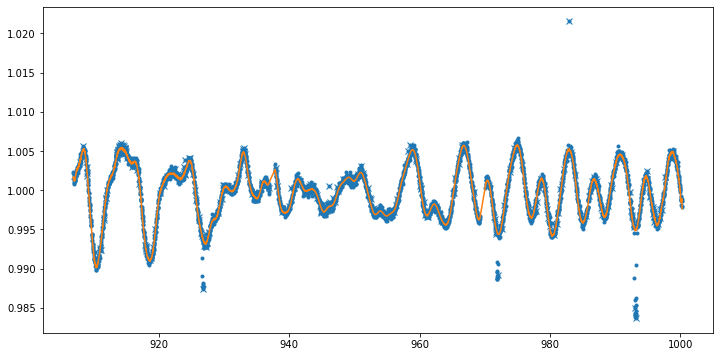

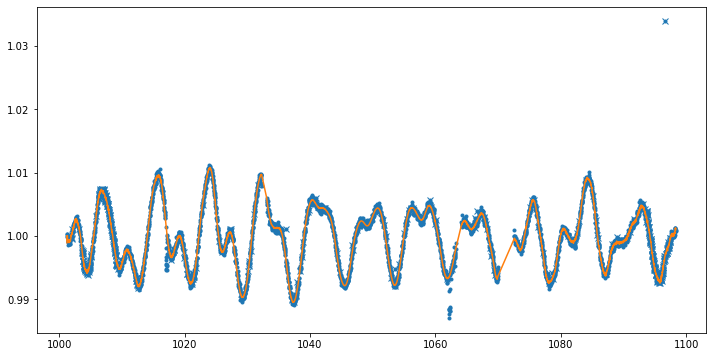

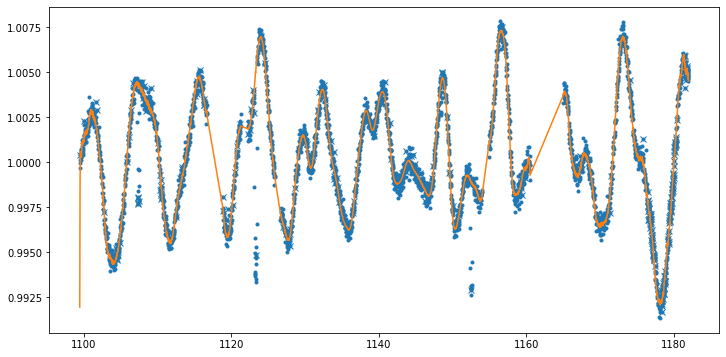

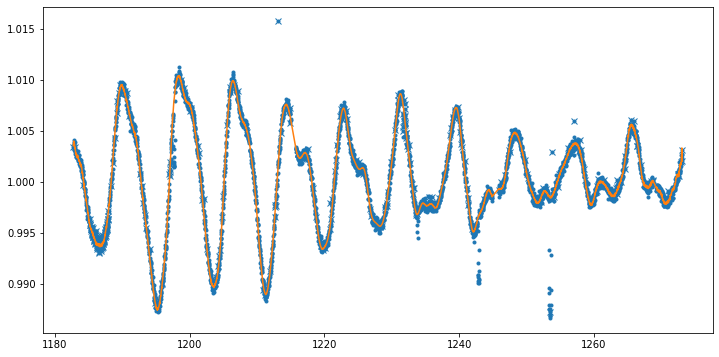

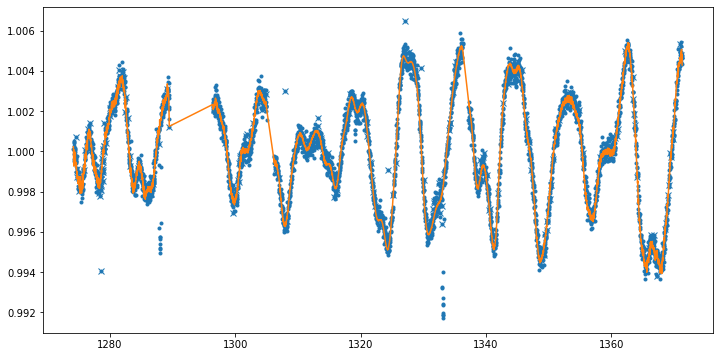

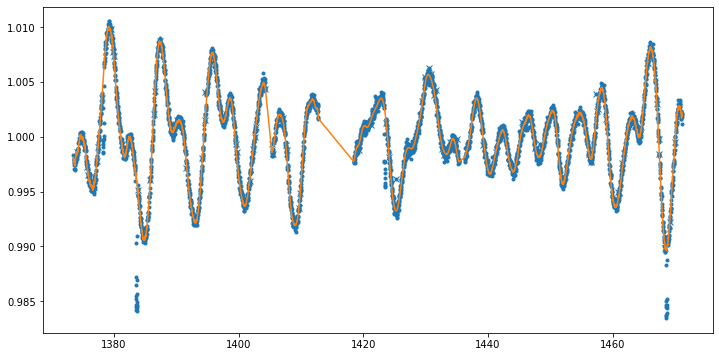

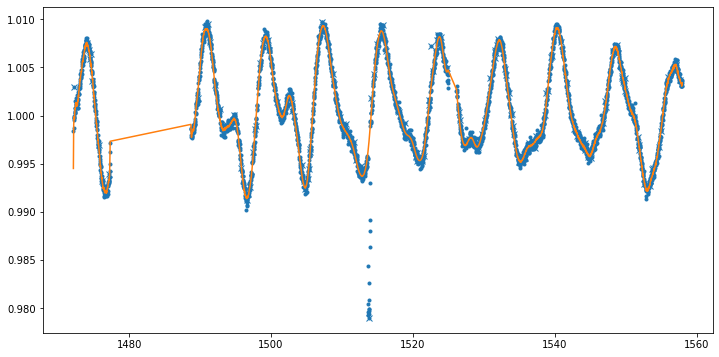

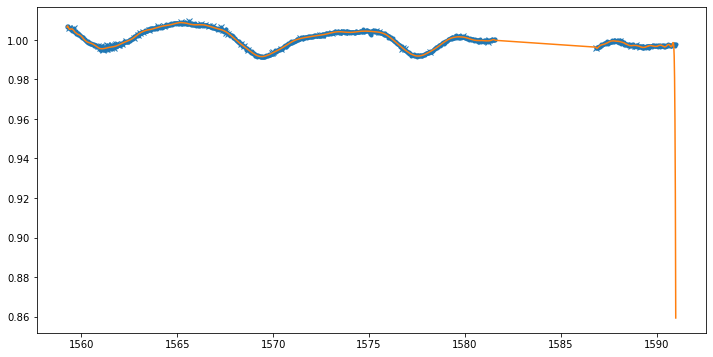

In [15]:
flux_base = []
for q in range(len(lc_data)):
    t, f, e, qual = tlist[q], flist[q], elist[q], qlist[q]
    fbase = fourier_baseline(t, f, filter_period)
    flux_base.append(fbase)
    plt.figure()
    plt.plot(t, f, '.')
    qflag = qual != 0
    plt.plot(t[qflag], f[qflag], 'x', color='C0')
    plt.plot(t, fbase, '-')

In [46]:
dt[['tc', 'Over']]

,tc,Over
0,159.111672,0
1,204.264257,0
2,249.416147,0
3,294.574843,0
4,339.727150,0
5,384.879526,0
6,430.034958,0
7,520.343529,0
8,565.502225,0
9,610.658907,0


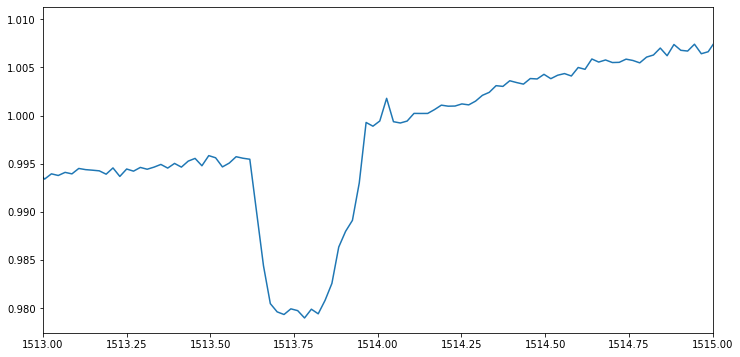

In [43]:
plt.xlim(1513, 1515)
plt.plot(tlist[-2], flist[-2])

In [16]:
from scipy.ndimage import median_filter

/var/folders/68/h6r0kcq50914zzw8n_70l69c0000gn/T/ipykernel_72188/2065458124.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


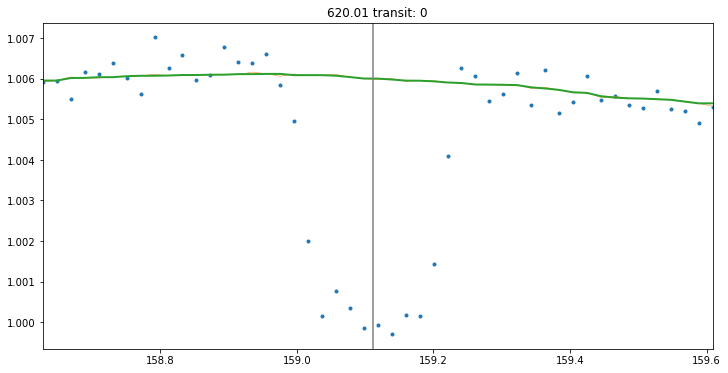

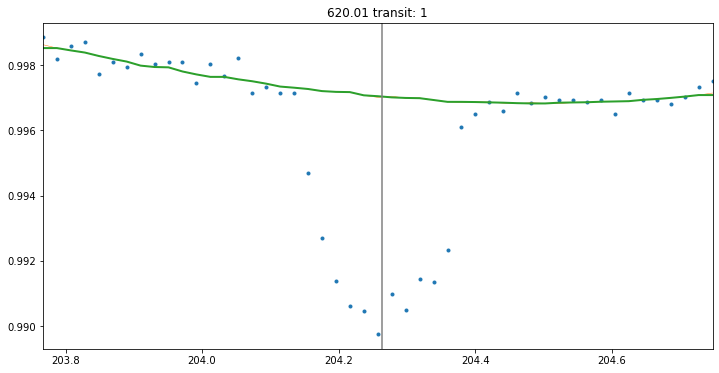

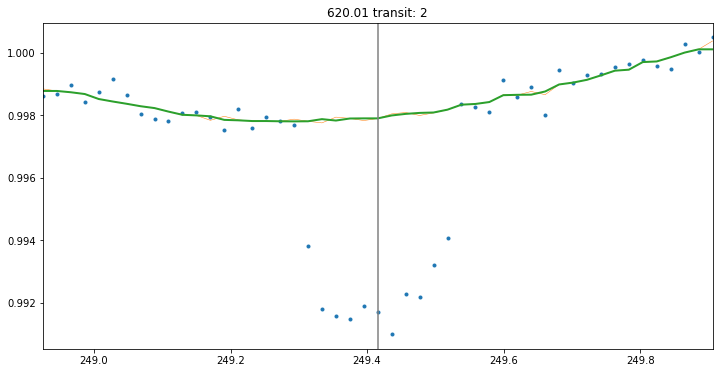

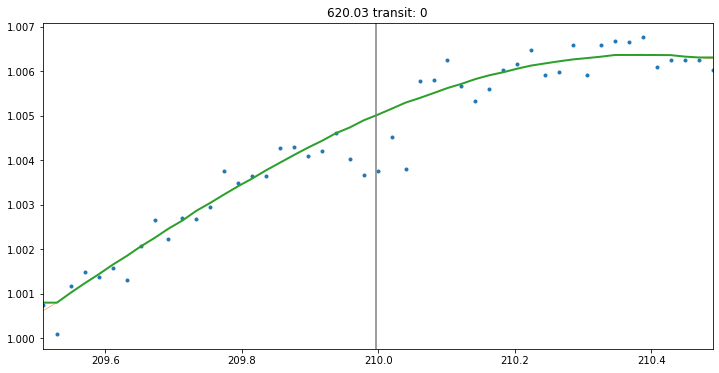

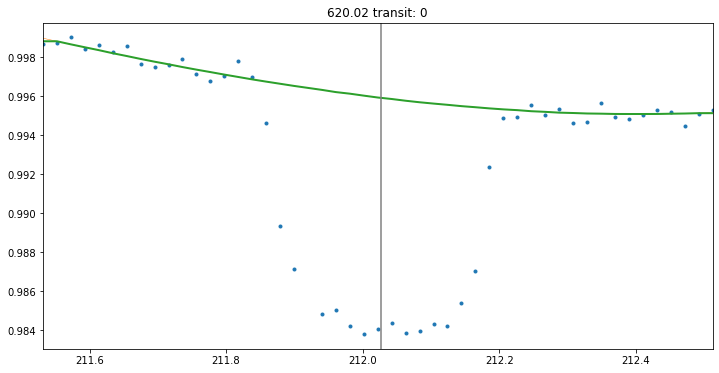

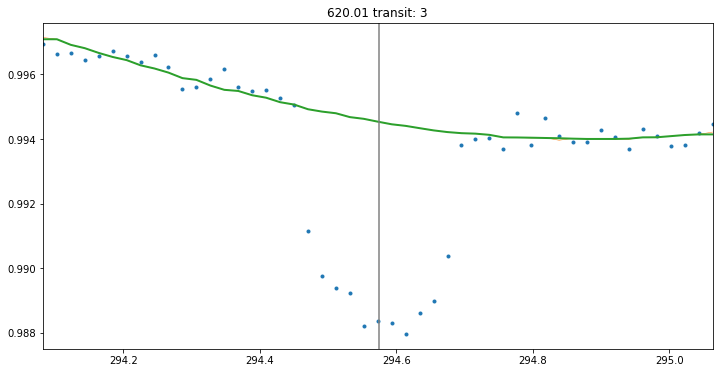

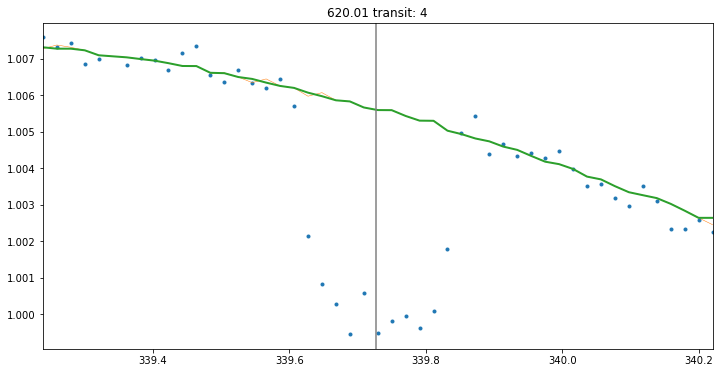

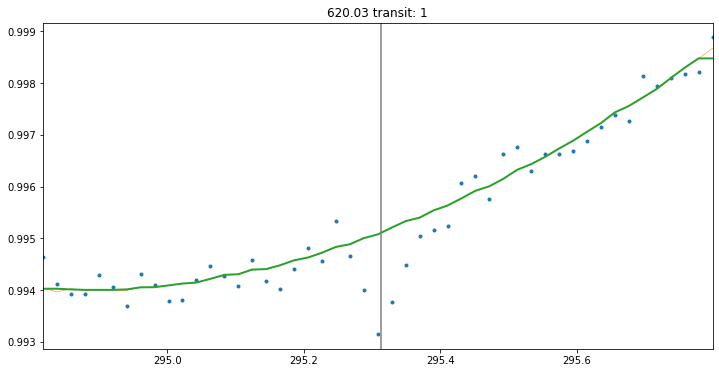

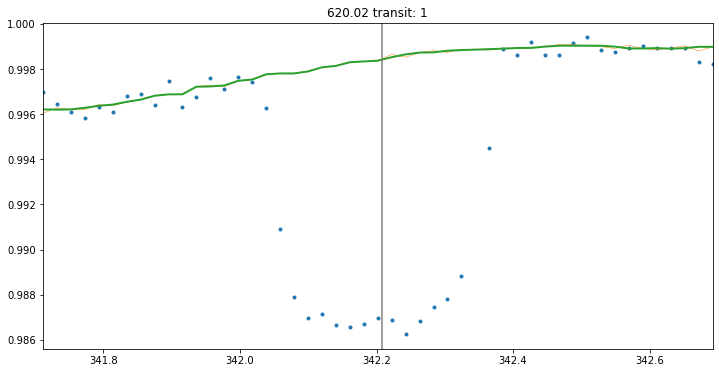

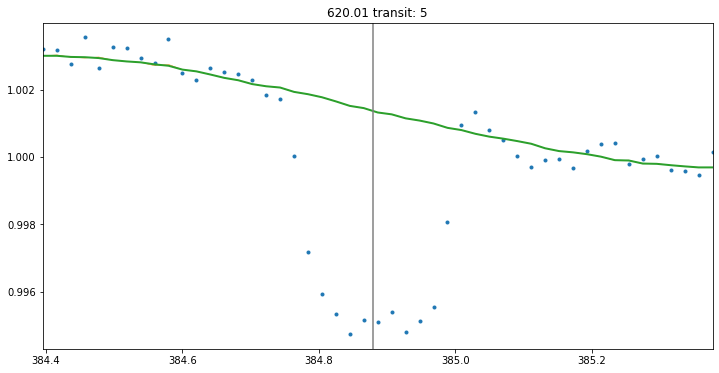

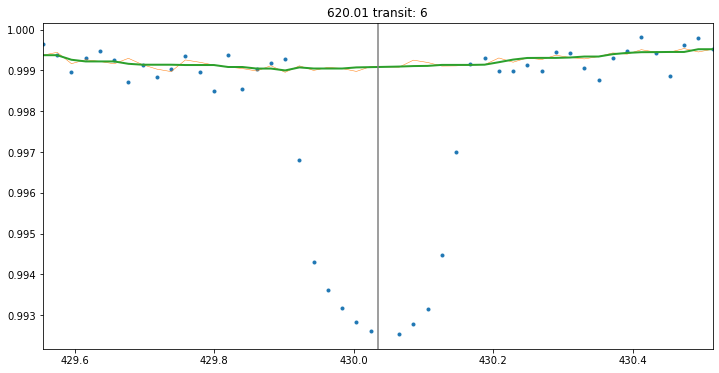

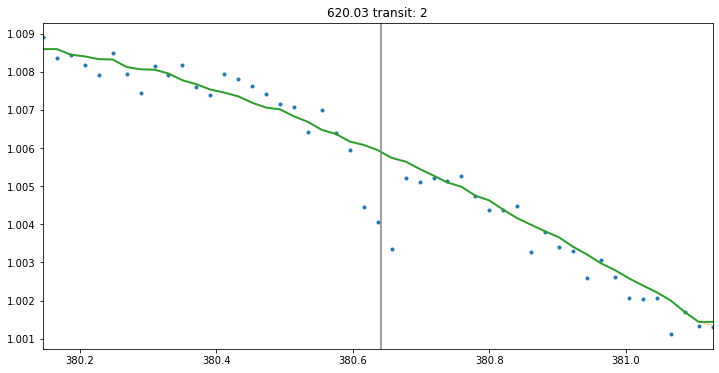

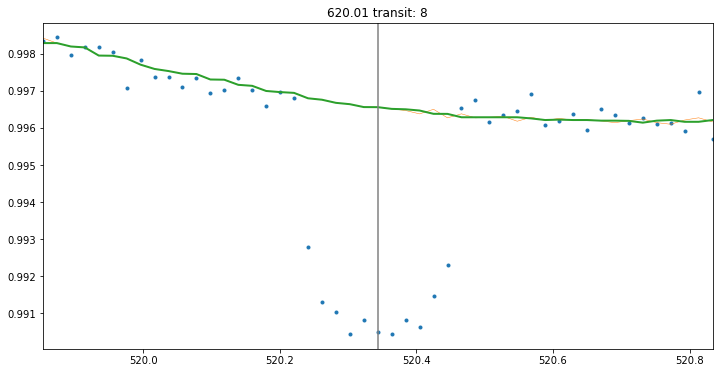

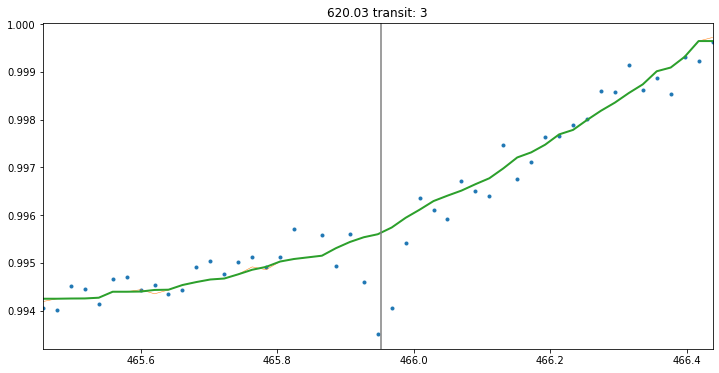

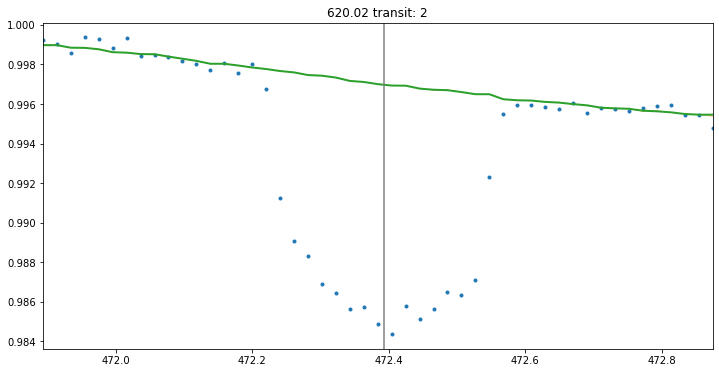

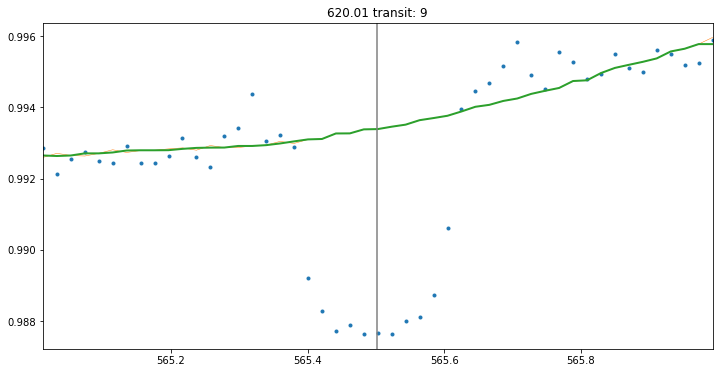

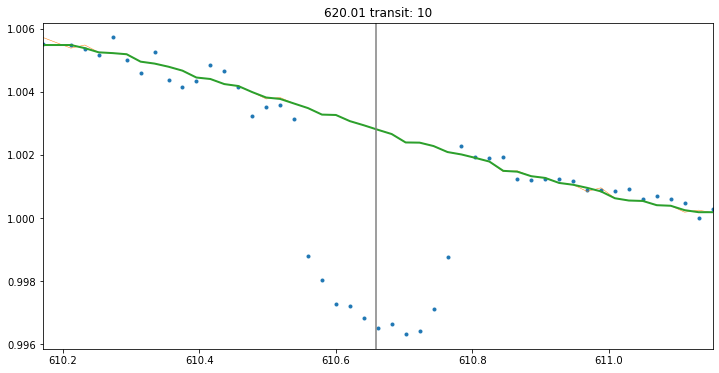

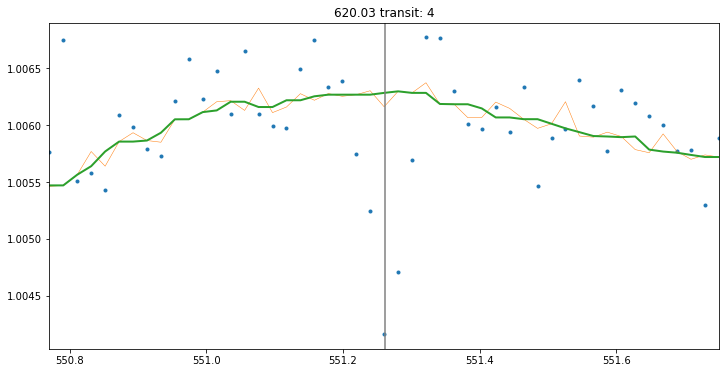

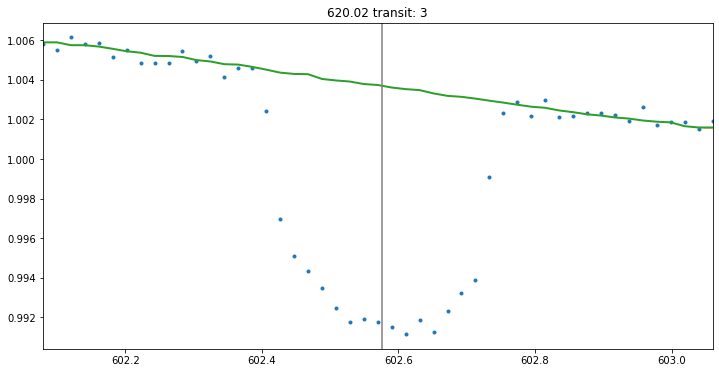

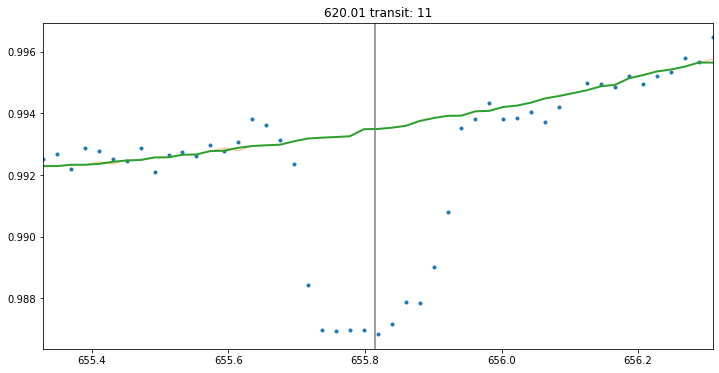

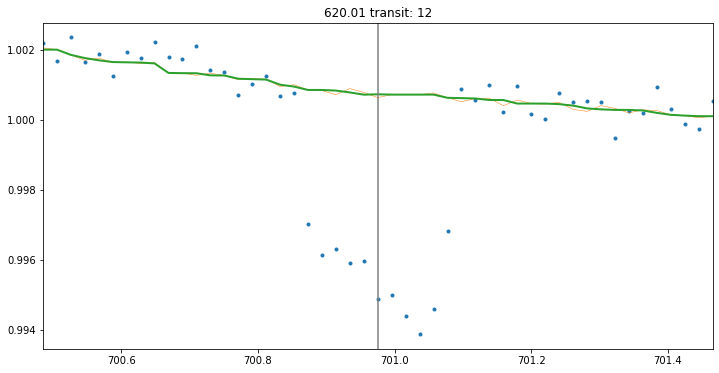

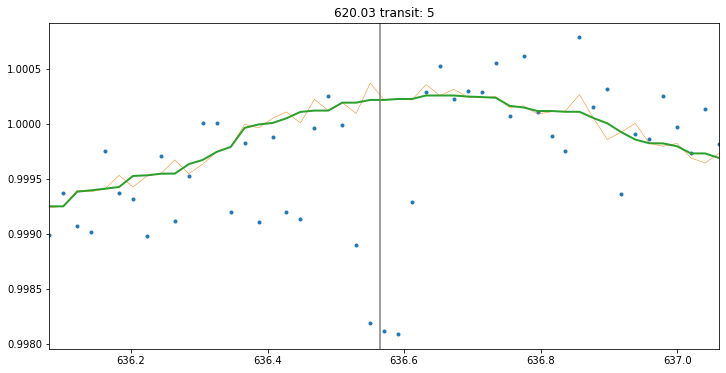

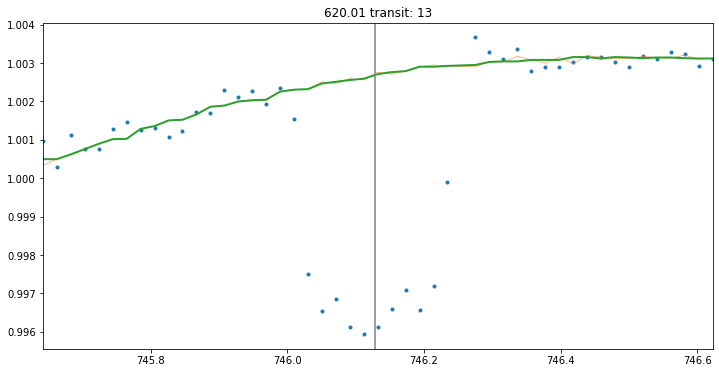

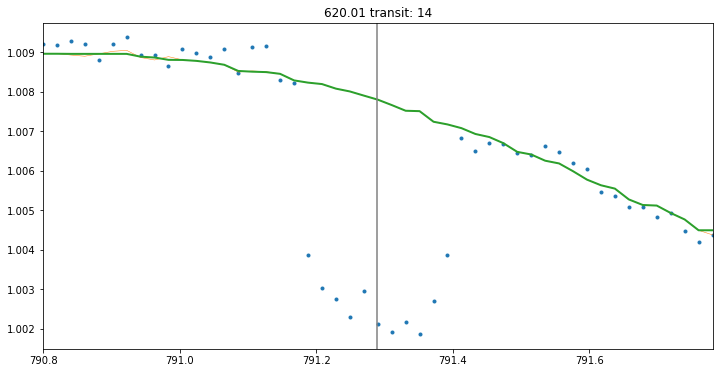

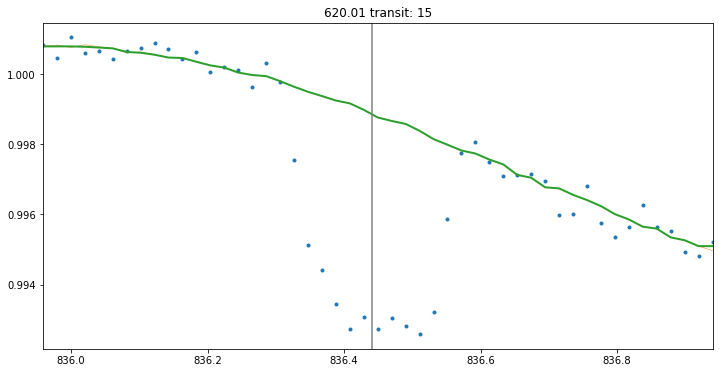

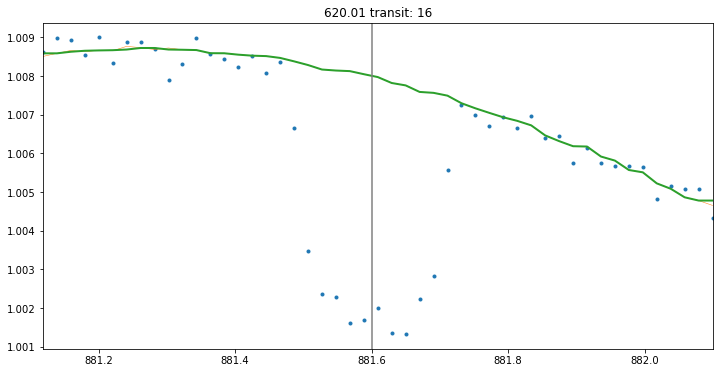

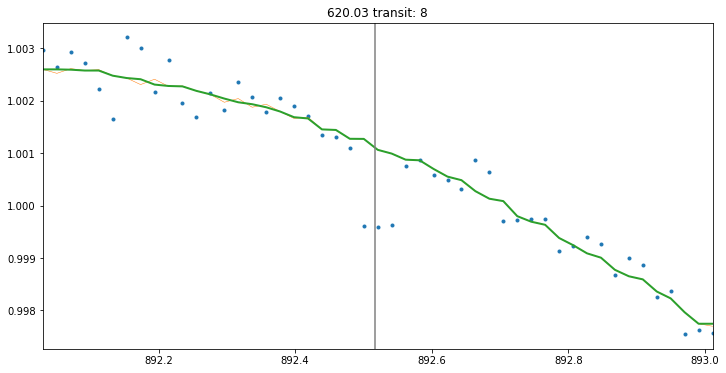

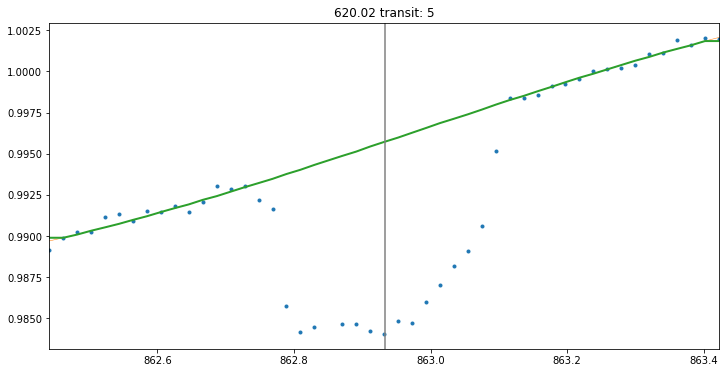

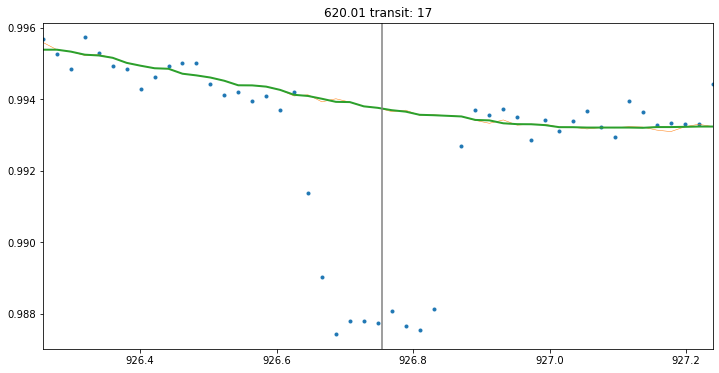

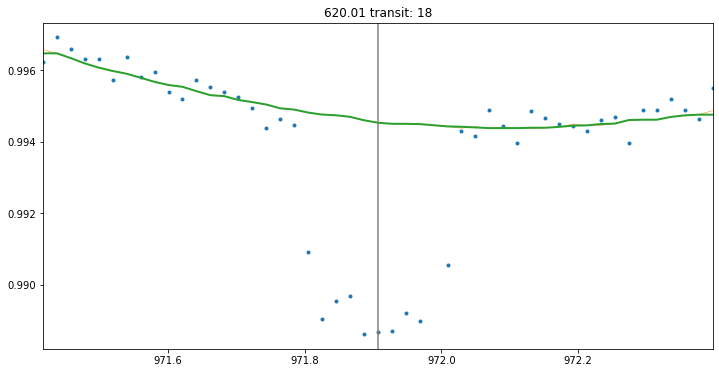

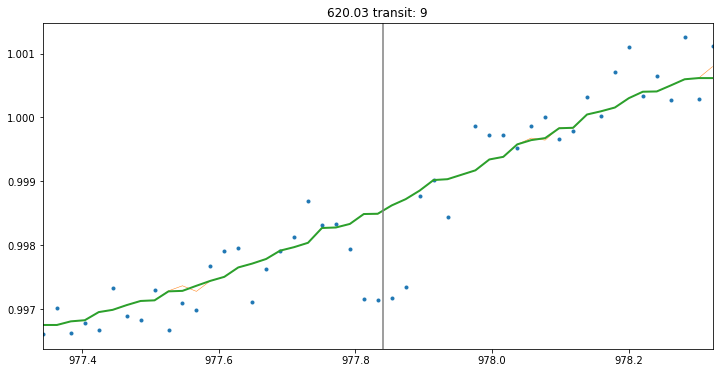

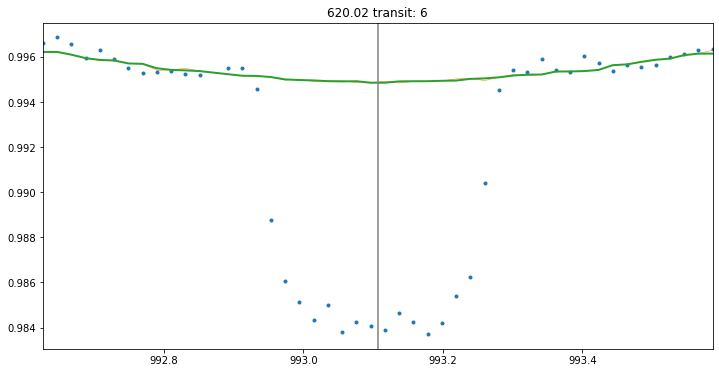

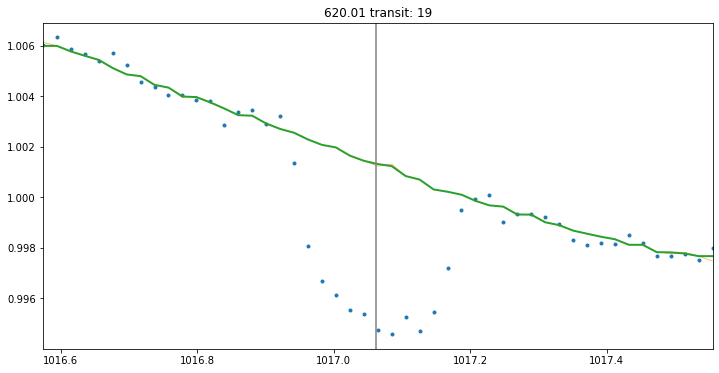

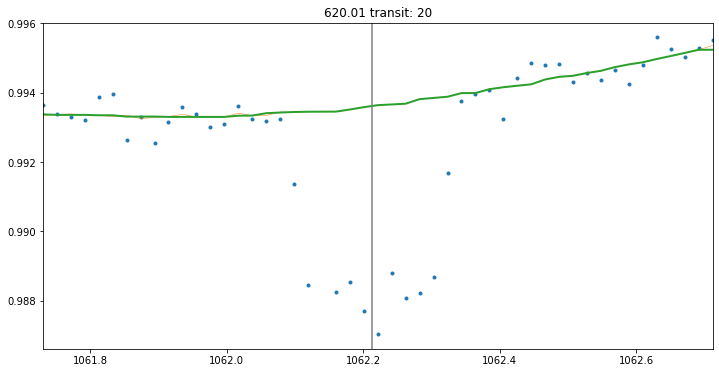

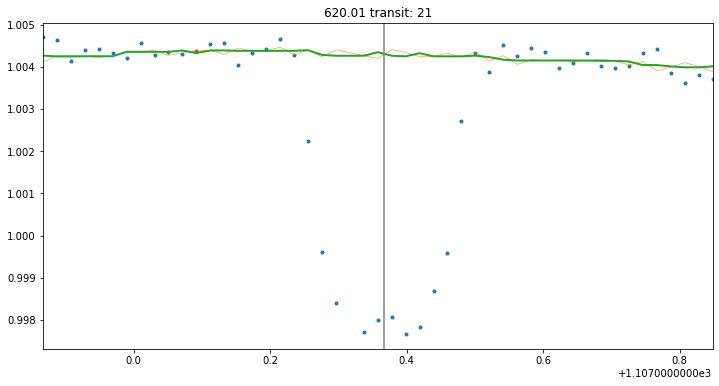

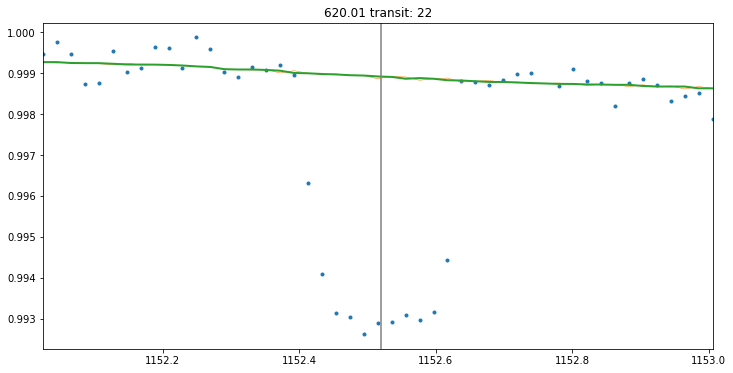

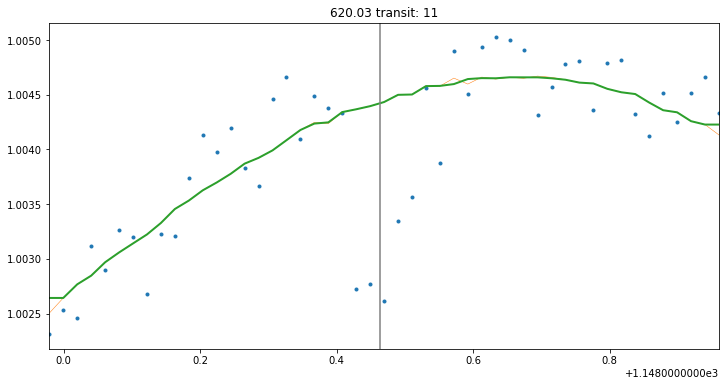

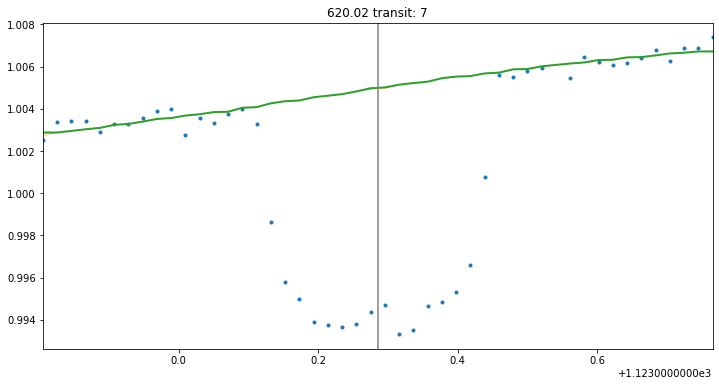

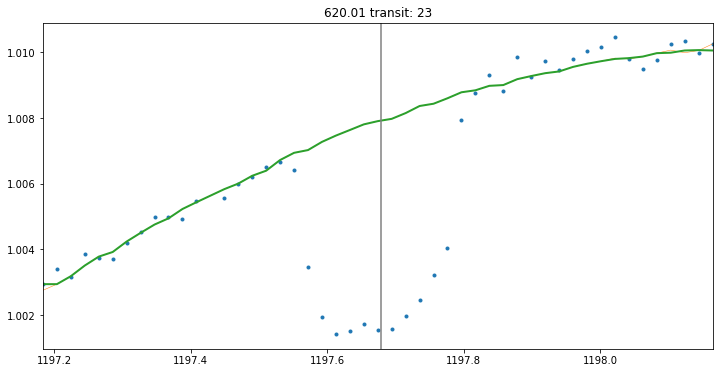

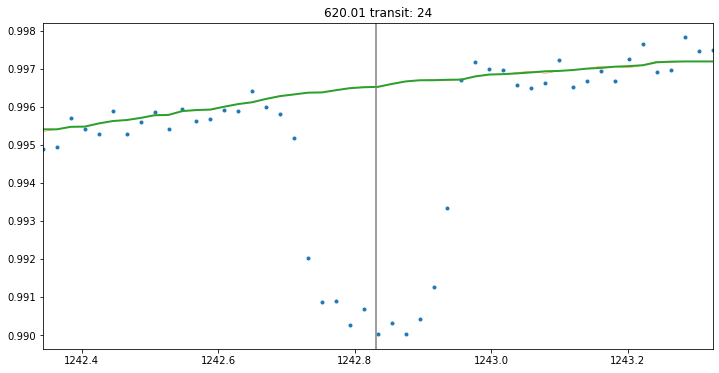

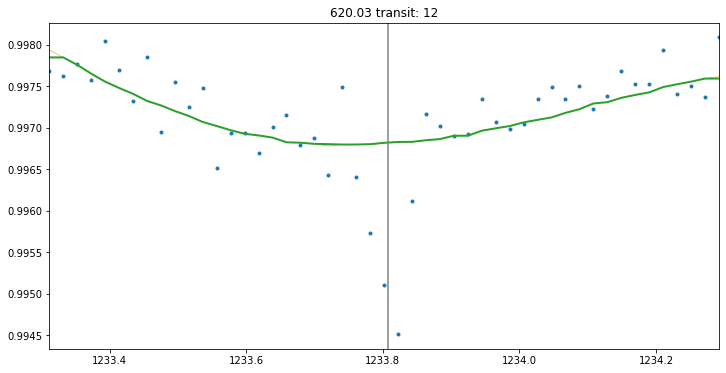

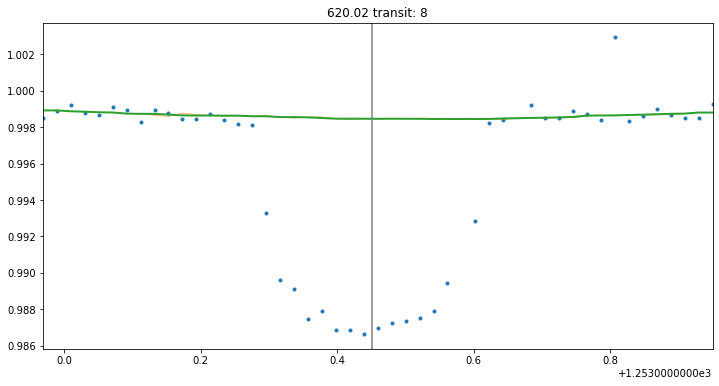

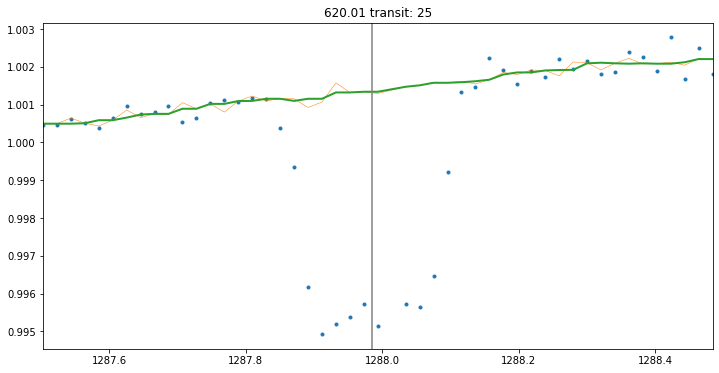

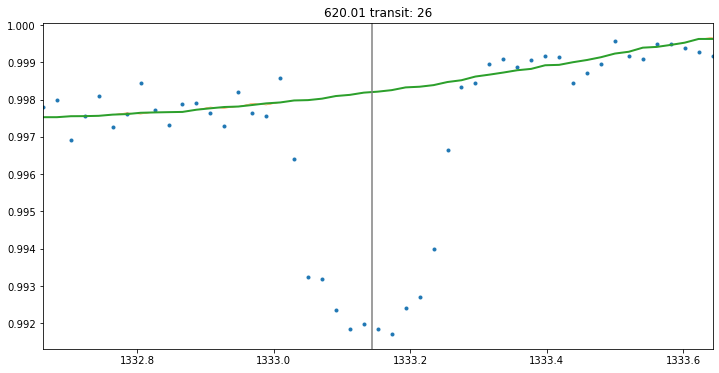

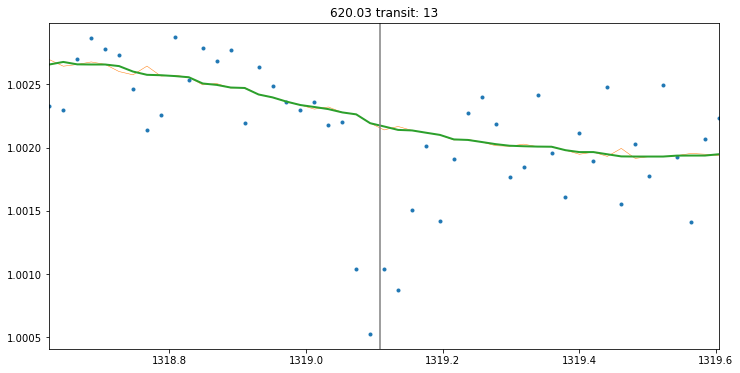

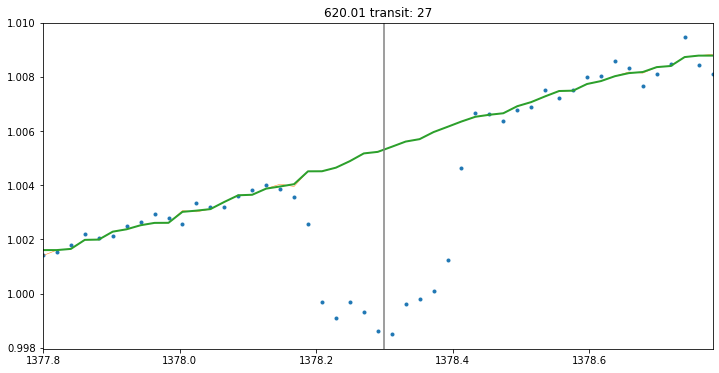

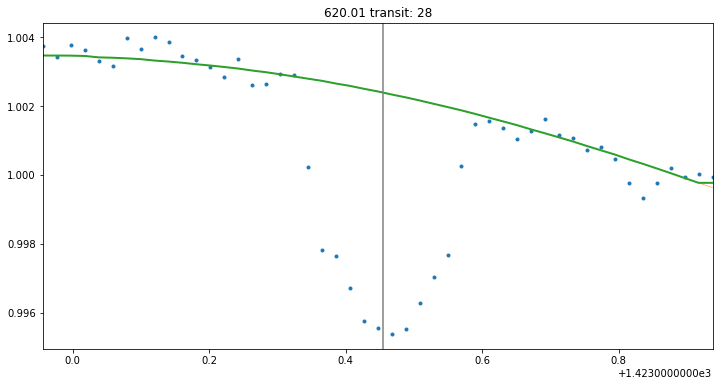

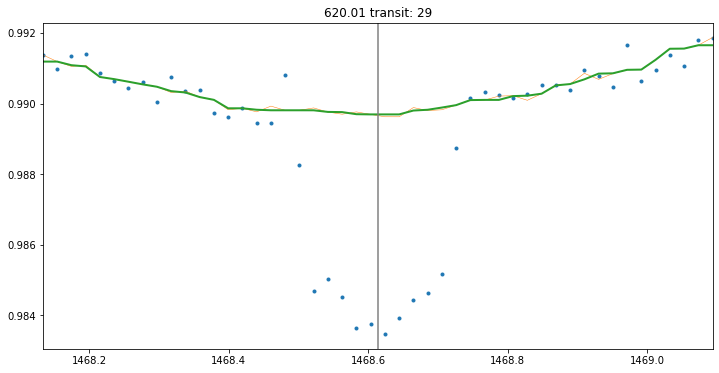

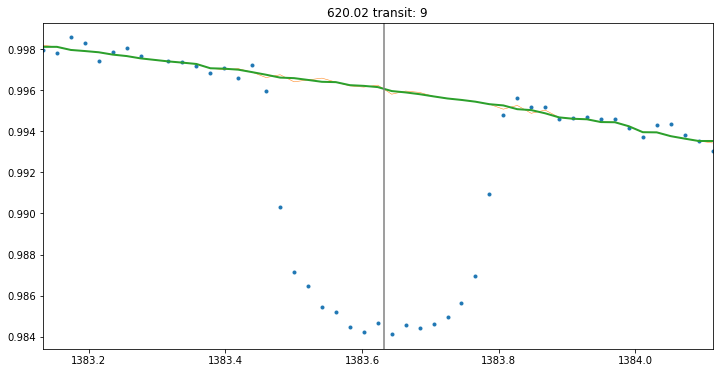

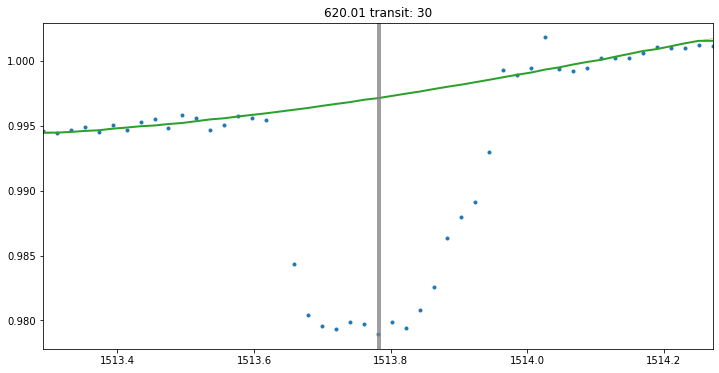

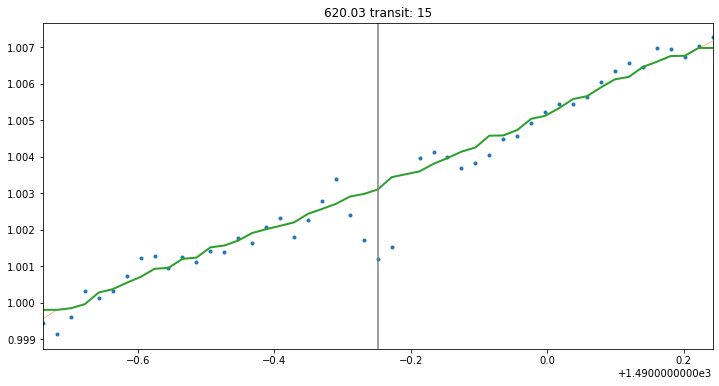

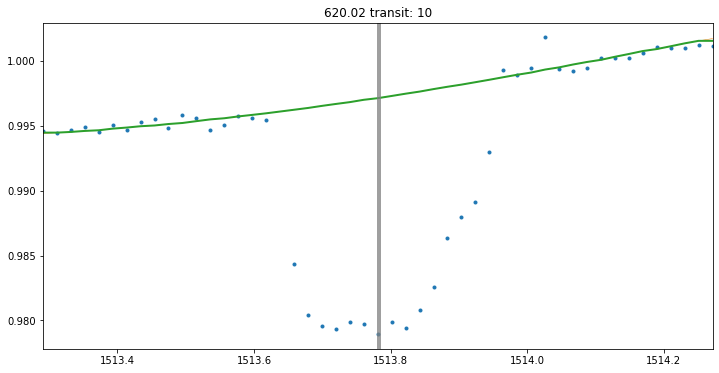

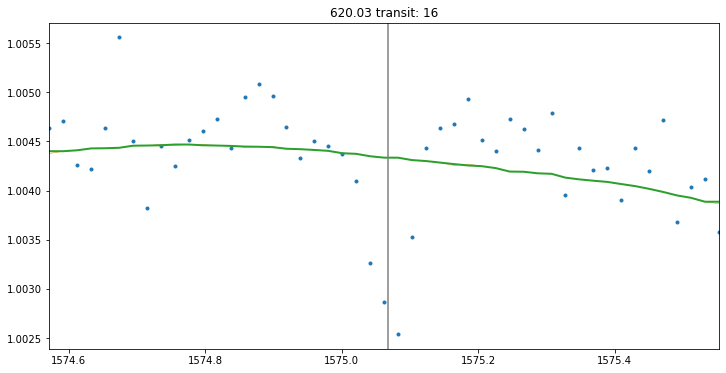

In [37]:
t_out, f_out, e_out = np.array([]), np.array([]), np.array([])
for q in range(len(lc_data)):
    t, f, e, qual = tlist[q], flist[q], elist[q], qlist[q]
    fbase = flux_base[q]
    for tc, koi, n, over in zip(dt.tc, dt.KOI, dt.N, dt.Over):
        idx = (np.abs(t-tc)<0.5)
        #idx &= (qual == 0) 
        if not np.sum(idx):
            continue
        plt.figure()
        plt.title(str(koi)+" transit: %d"%n)
        plt.xlim(np.min(t[idx]), np.max(t[idx]))
        plt.plot(t[idx], f[idx], '.')
        plt.plot(t[idx], fbase[idx], lw=0.5)
        smoothfbase = median_filter(fbase[idx], size=5)
        plt.plot(t[idx], smoothfbase, lw=2)
        for tc in dt.tc:
            plt.axvline(x=tc, color='gray')
        if not over:
            t_out = np.r_[t_out, t[idx]]
            f_out = np.r_[f_out, f[idx]/smoothfbase]
            e_out = np.r_[e_out, e[idx]/smoothfbase]

In [18]:
df_lc = pd.DataFrame(data={"time": t_out, "flux": f_out, "error": e_out}).sort_values("time").reset_index(drop=True)

In [19]:
df_lc

,time,flux,error
0,158.628017,0.999973,0.000288
1,158.648451,0.999997,0.000288
2,158.668886,0.999478,0.000288
3,158.689320,1.000145,0.000288
4,158.709754,1.000079,0.000288
...,...,...,...
2467,1575.470984,1.000730,0.000296
2468,1575.491418,0.999733,0.000296
2469,1575.511852,1.000111,0.000296
2470,1575.532286,1.000231,0.000296


In [20]:
df_lc.to_csv("lc_no_overlap.txt", index=False)

## double transit

In [21]:
dt[dt.Over==1]

,KOI,N,tn,O-C,e_O-C,f_O-C,TDV,e_TDV,f_TDV,TPV,e_TPV,f_TPV,Out,Over,pidx,tc,tcerr
29,620.01,30,1513.766640,22.44,1.0,,0.3280,0.0049,,1.740,0.0053,,60,1,1,1513.782223,0.000694
52,620.02,10,1513.815888,-44.07,0.9,,-0.0356,0.0041,,0.464,0.0053,,48,1,3,1513.785284,0.000625


In [22]:
tc_double = np.mean(dt[dt.Over==1].tc)

In [23]:
result_sc = result_all[np.array(result_all.exptime) == 60]

In [24]:
result_sc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 12,2012,Kepler,60,kplr011773022,0.0
1,Kepler Quarter 12,2012,Kepler,60,kplr011773022,0.0
2,Kepler Quarter 12,2012,Kepler,60,kplr011773022,0.0
3,Kepler Quarter 13,2012,Kepler,60,kplr011773022,0.0
4,Kepler Quarter 13,2012,Kepler,60,kplr011773022,0.0
5,Kepler Quarter 13,2012,Kepler,60,kplr011773022,0.0
6,Kepler Quarter 14,2012,Kepler,60,kplr011773022,0.0
7,Kepler Quarter 14,2012,Kepler,60,kplr011773022,0.0
8,Kepler Quarter 14,2012,Kepler,60,kplr011773022,0.0


In [25]:
lc_data_q16 = result_sc[13].download_all()

In [26]:
t, f, e, qual = lc_quarter(lc_data_q16, 0)
idxd = np.abs(t - tc_double) < 1.5
t, f, e, qual = t[idxd], f[idxd], e[idxd], qual[idxd]

In [29]:
filter_period = 1.5

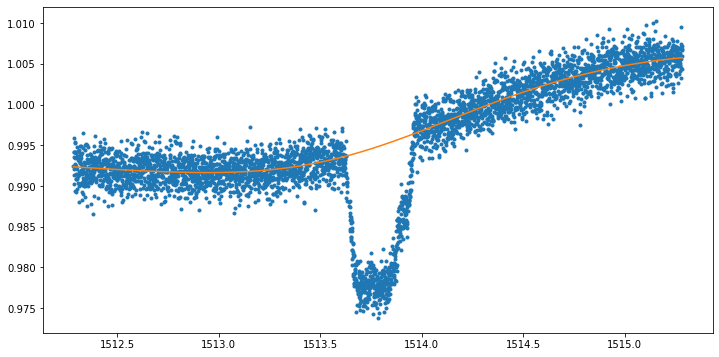

In [30]:
idx = qual==0
plt.plot(t[idx], f[idx], '.')
fbase = fourier_baseline(t[idx], f[idx], filter_period)
plt.plot(t[idx], fbase)

In [31]:
tout = t[idx]
fout = f[idx] / fbase
eout = e[idx] / fbase

In [32]:
len(tout)

4301

1430

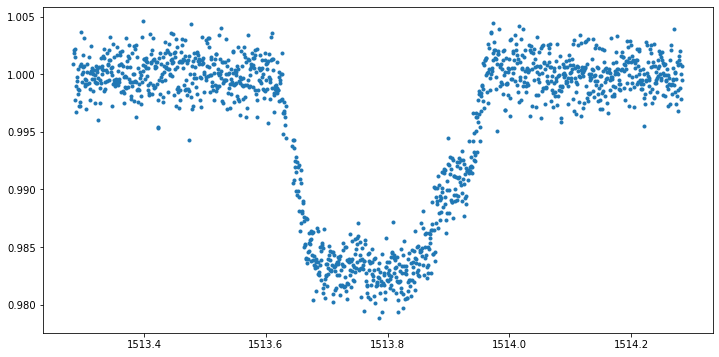

In [34]:
idxo = np.abs(tout - tc_double) < 0.5
#plt.xlim(tc_double-0.5, tc_double+0.5)
plt.plot(tout[idxo], fout[idxo], '.')
np.sum(idxo)

In [35]:
pd.DataFrame(data={"time": tout[idxo], "flux": fout[idxo], "error": eout[idxo]}).to_csv("lc_double.txt", index=False)